<a href="https://colab.research.google.com/github/aso1901104/AI_teach2020/blob/master/2020AI030A_family_mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
# 画像を表示するためにpyplot
import matplotlib.pyplot as plt
# openCV
import cv2
# webからダウンロードするためインポートする
import urllib.request as req

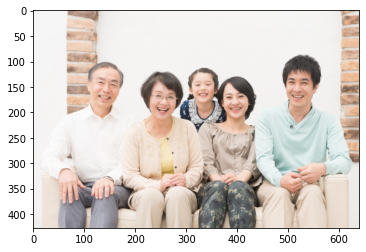

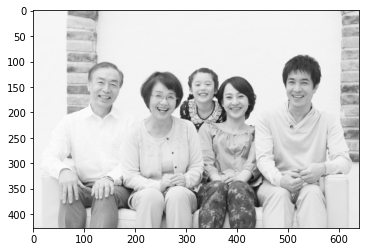

In [107]:
# ダウンロード元のURL文字列
url = "https://raw.githubusercontent.com/masatokg/sample_photo/master/familyface001.PNG"
# 保存ファイル名
savefile = "family.png"
req.urlretrieve(url, savefile)
# 保存した画像をプログラムに読み込む
img = cv2.imread(savefile) #四角用
img_c = cv2.imread(savefile) #モザイク用
# 物体認識するために、白黒(グレースケール)に変換した画像イメージを作る
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 画像のプロットを作って表示
# plt.imshow(img_gray)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

In [108]:
# カスケードファイルをダウンロード
# ダウンロード元のURL文字列
url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml"
# 保存ファイル名
cascade_file = "cascade_file.xml"
# 画像をダウンロードして保存
req.urlretrieve(url, cascade_file)
# カスケードXMLをプログラムに読み込む(学習モデルを生成)
cascade = cv2.CascadeClassifier(cascade_file)

In [109]:
# モザイク処理の関数(mosaic)
# 引数は対象画像、エリアを表すタプル(左上のx座標y座標、右下のx座標y座標)、最小時のサイズ
def mosaic(img, rect, size):
  # モザイクをかける領域座標を変数に代入
  (x1, y1, x2, y2) = rect
  w = x2 - x1 # 横幅を計算
  h = y2 - y1 # 縦幅を計算
  # 画像を[開始行：終了行, 開始列：終了列]で指定して切り抜き
  i_rect = img[y1:y2, x1:x2]
  # 切り抜いた画像を指定サイズに縮小して(ピクセルをつぶして)コピー
  i_small = cv2.resize(i_rect, (size,size))
  # 縮小した画像データを元のサイズに拡大する(つぶれたピクセルのまま拡大)
  # interpolationは拡大時にどんなピクセルで補完するかを指定
  i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
  # 　できあがったモザイクデータを元の画像に重ねる
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos # 行、列で指定した領域にi_mosを上書き
  # 出来上がったモザイク付きのコピーをリターン
  return img2

5 件見つかりました
顔の座標： x= 487  y= 117  横幅= 66  縦幅= 66
顔の座標： x= 112  y= 118  横幅= 67  縦幅= 67
顔の座標： x= 304  y= 122  横幅= 58  縦幅= 58
顔の座標： x= 226  y= 146  横幅= 62  縦幅= 62
顔の座標： x= 367  y= 148  横幅= 59  縦幅= 59


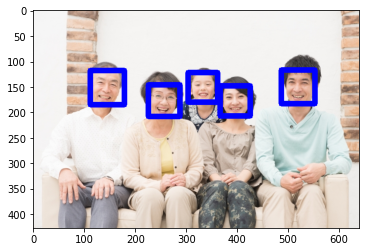

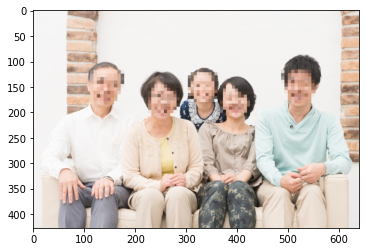

In [110]:
# 画像から自作関数で顔を検出
face_list = cascade.detectMultiScale(img_gray, minSize=(50, 50))
# 検出失敗したらメッセージを表示
if len(face_list) == 0:
  print("顔が見つかりません")
else:
  print(len(face_list), "件見つかりました")

# 検出した数だけループ(face_listには(x,y,w,h)というタプル配列リスト)
for (x, y, w, h) in face_list:
  print("顔の座標： x=", x, " y=", y, " 横幅=", w, " 縦幅=", h)
  #短形(rectangle)の色ピクセル情報を定義
  red = (255, 0, 0) # BGRで3色のタプルを定義
  # img画像(元の画像)に短形を追加、引数は対象画像、短形の左上座標、右下座標、色情報、線の細さの順
  img_r = cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=10)

# 短形が追加された画像データ(img_r)をファイル保存
cv2.imwrite("face-detect.png", img_r)
plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
plt.show()

# 検出したエリアに自作関数でモザイクをかける
for (x, y, w, h) in face_list:
  img_c = mosaic(img_c, (x, y, x+w, y+h), 10)

# モザイクをつけた画像を表示
cv2.imwrite("family_mosaic.png", img_c) #保存
plt.imshow(cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB))
plt.show()